In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import holidays

In [2]:
velib = pl.read_csv("C:/Users/pc/Desktop/historique_stations.csv")
velib.head()

datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative
str,i64,i64,i64,str,str,bool
"""2020-11-26T12:59Z""",35,4,5,"""Benjamin Godard - Victor Hugo""","""48.86598,2.27572""",true
"""2020-11-26T12:59Z""",55,23,4,"""André Mazet - Saint-André des …","""48.85376,2.33910""",true
"""2020-11-26T12:59Z""",20,0,0,"""Charonne - Robert et Sonia Del…","""48.85591,2.39257""",true
"""2020-11-26T12:59Z""",21,0,1,"""Toudouze - Clauzel""","""48.87930,2.33736""",true
"""2020-11-26T12:59Z""",30,3,1,"""Mairie du 12ème""","""48.84086,2.38755""",true


In [3]:
velib.tail()

datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative
str,i64,i64,i64,str,str,bool
"""2021-04-09T14:37Z""",38,4,2,"""Général Michel Bizot - Claude …","""48.83481,2.40093""",true
"""2021-04-09T14:37Z""",20,2,1,"""Ivry - Baudricourt""","""48.82470,2.36311""",true
"""2021-04-09T14:37Z""",39,17,0,"""Saint-Mandé - Docteur Arnold N…","""48.84463,2.40495""",true
"""2021-04-09T14:37Z""",21,12,4,"""Saint-Marcel - Hôpital""","""48.83950,2.36099""",true
"""2021-04-09T14:37Z""",36,12,5,"""Guynemer - Jardin du Luxembour…","""48.84661,2.33255""",true


In [4]:
# statistical summary
velib.describe()

statistic,datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative
str,str,f64,f64,f64,str,str,f64
"""count""","""10986730""",1.098673e7,1.098673e7,1.098673e7,"""10986730""","""10986730""",1.098673e7
"""null_count""","""0""",0.0,0.0,0.0,"""0""","""0""",0.0
"""mean""",null,31.465766,7.845411,3.502016,null,null,0.980206
"""std""",null,12.018012,9.007581,3.144555,null,null,null
"""min""","""2020-11-26T12:59Z""",0.0,0.0,0.0,""" Jean Bleuzen - Square du 11 N…","""48.76462,2.40712""",0.0
"""25%""",null,23.0,1.0,1.0,null,null,null
"""50%""",null,30.0,5.0,3.0,null,null,null
"""75%""",null,37.0,11.0,5.0,null,null,null
"""max""","""2021-04-09T14:37Z""",74.0,73.0,41.0,"""Île de la Jatte""","""48.94702,2.25690""",1.0


In [5]:
# Object for public holidays in France
fr_holidays = holidays.FR()

def is_holiday(d: pl.date) -> bool:
    return d in fr_holidays

In [6]:
def preprocess_velib_data(velib: pl.DataFrame) -> pl.DataFrame:
    """
    Preprocesses Velib bike sharing data by:
    1. Parsing datetime column into date, time and weekday components
    2. Calculating total available bikes and free terminals
    3. Extracting latitude and longitude from station_geo
    
    Args:
        velib (pl.DataFrame): Raw Velib dataframe
        
    Returns:
        pl.DataFrame: Preprocessed Velib dataframe with additional columns
    """
    # parse datetime column and extract date and time
    velib = velib.with_columns(
        # Step 1: Parse the string into a Datetime object
        # Polars' default parser usually handles ISO 8601 format (T separator, Z for UTC)
        datetime = pl.col("datetime").str.to_datetime()
    ).with_columns(
        # Step 2: Extract date features from the new Datetime object
        date = pl.col("datetime").dt.date(),
        is_holiday = pl.col("datetime").is_in(fr_holidays),
        weekday = pl.col("datetime").dt.weekday(),
        week_of_year = pl.col("datetime").dt.week(),
        time = pl.col("datetime").dt.time()
    )

    # create new columns
    total_available = pl.col("available_mechanical") + pl.col("available_electrical")

    velib = velib.with_columns(
        total_available = total_available,
        free_terminals = pl.col("capacity") - total_available,
    )
    
    return velib

velib = preprocess_velib_data(velib)
velib.sample(10)

datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative,date,is_holiday,weekday,week_of_year,time,total_available,free_terminals
"datetime[μs, UTC]",i64,i64,i64,str,str,bool,date,bool,i8,i8,time,i64,i64
2021-01-13 12:56:00 UTC,27,8,6,"""Quai de l'Aisne - Général Lecl…","""48.89571,2.40057""",true,2021-01-13,false,3,2,12:56:00,14,13
2021-01-29 16:51:00 UTC,50,1,5,"""Porte d'Ivry""","""48.82177,2.36887""",true,2021-01-29,false,5,4,16:51:00,6,44
2021-03-10 23:35:00 UTC,20,6,6,"""Fessart - Château""","""48.84245,2.23989""",true,2021-03-10,false,3,10,23:35:00,12,8
2020-12-11 10:31:00 UTC,32,27,4,"""Quai Voltaire""","""48.85894,2.33142""",true,2020-12-11,false,5,50,10:31:00,31,1
2021-02-26 21:13:00 UTC,33,17,2,"""Octave Gréard - Tour Eiffel""","""48.85650,2.29318""",true,2021-02-26,false,5,8,21:13:00,19,14
2020-12-02 21:32:00 UTC,40,13,0,"""Hôpital Necker""","""48.84604,2.31325""",true,2020-12-02,false,3,49,21:32:00,13,27
2020-11-27 19:20:00 UTC,21,7,0,"""Jean Oestreicher - Porte de Ch…","""48.88656,2.28864""",true,2020-11-27,false,5,48,19:20:00,7,14
2021-03-23 21:53:00 UTC,23,6,3,"""Suffren - Champ de Mars""","""48.85472,2.29522""",true,2021-03-23,false,2,12,21:53:00,9,14
2021-03-13 17:47:00 UTC,63,9,0,"""Place Adolphe Cherioux - Vaugi…","""48.83959,2.30107""",true,2021-03-13,false,6,10,17:47:00,9,54


In [7]:
print(velib.filter(pl.col("is_holiday")==True))

shape: (0, 14)
┌────────────┬──────────┬────────────┬────────────┬───┬────────────┬──────┬────────────┬───────────┐
│ datetime   ┆ capacity ┆ available_ ┆ available_ ┆ … ┆ week_of_ye ┆ time ┆ total_avai ┆ free_term │
│ ---        ┆ ---      ┆ mechanical ┆ electrical ┆   ┆ ar         ┆ ---  ┆ lable      ┆ inals     │
│ datetime[μ ┆ i64      ┆ ---        ┆ ---        ┆   ┆ ---        ┆ time ┆ ---        ┆ ---       │
│ s, UTC]    ┆          ┆ i64        ┆ i64        ┆   ┆ i8         ┆      ┆ i64        ┆ i64       │
╞════════════╪══════════╪════════════╪════════════╪═══╪════════════╪══════╪════════════╪═══════════╡
└────────────┴──────────┴────────────┴────────────┴───┴────────────┴──────┴────────────┴───────────┘


In [8]:
# Extract hour from time column
velib = velib.with_columns(
    hour = pl.col("time").cast(str).str.slice(0, 2).cast(pl.Int32)
)

# Group by date, hour, and station, taking last value in each hour
velib = velib.group_by(["date", "hour", "station_name"]).agg([
    pl.col("weekday").last(),
    pl.col("week_of_year").last(),
    pl.col("is_holiday").last(),
    pl.col("total_available").last(),
    pl.col("available_mechanical").last(), 
    pl.col("available_electrical").last(),
    pl.col("free_terminals").last()
])

In [9]:
# drop datetime column and reorder columns
new_velib = velib.select([
    "date",
    "is_holiday",
    "week_of_year",
    "weekday",
    "hour",
    "station_name",
    "total_available",
    "available_mechanical",
    "available_electrical",
    "free_terminals"
]).sort(["date", "hour", "station_name"])

new_velib.sample(10)

date,is_holiday,week_of_year,weekday,hour,station_name,total_available,available_mechanical,available_electrical,free_terminals
date,bool,i8,i8,i32,str,i64,i64,i64,i64
2021-01-28,false,4,4,1,"""Centre Georges Pompidou""",6,4,2,20
2020-11-28,false,48,6,10,"""Erasme - Ulm""",10,6,4,14
2021-02-21,false,7,7,15,"""Louis Xavier de Ricard - Ancie…",1,0,1,33
2021-03-31,false,13,3,17,"""Cujas - Saint-Michel""",3,1,2,16
2021-03-21,false,11,7,19,"""Bercy - Traversiére""",10,10,0,20
2020-12-07,false,50,1,14,"""Raspail - Varenne""",11,7,4,7
2021-01-02,false,53,6,4,"""Bézout - Général Leclerc""",9,6,3,21
2020-12-09,false,50,3,14,"""Dominique Pado - Croix Nivert""",11,8,3,11
2021-03-18,false,11,4,23,"""Place de Rungis""",29,19,10,3


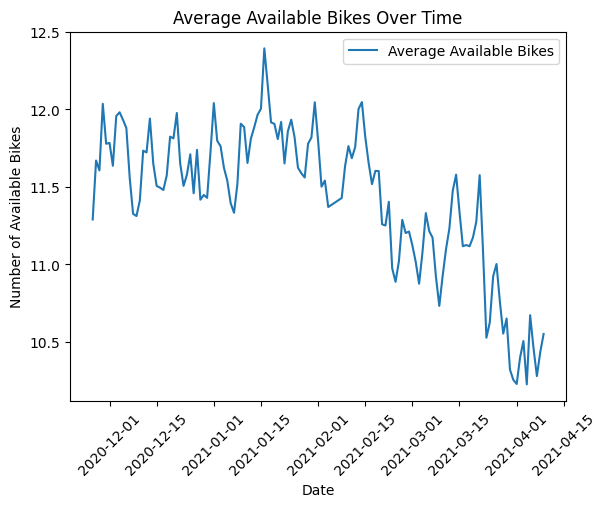

In [10]:
# Group by date and calculate mean total_available across all stations
daily_avg = velib.group_by("date").agg(avg_available=pl.col("total_available").mean()).sort("date")

plt.plot(daily_avg["date"], daily_avg["avg_available"], label='Average Available Bikes')
plt.xlabel('Date')
plt.ylabel('Number of Available Bikes')
plt.title('Average Available Bikes Over Time')
plt.xticks(rotation=45)
plt.legend()

In [11]:
# Create a mapping of unique station names to IDs
station_mapping = (
    velib.sort("station_name")
    .select("station_name")
    .unique()
    .with_row_index("station_id")
)

# Add station IDs to original dataframe by joining on station_name
new_df = velib.join(
    station_mapping,
    on="station_name",
    how="left"
)


In [12]:
# Create a mapping of unique station names to IDs
station_mapping = (
    velib.sort("station_name")
    .select("station_name")
    .unique()
    .with_row_index("station_id")
)

# Add station IDs to original dataframe by joining on station_name
new_df = velib.join(
    station_mapping,
    on="station_name",
    how="left"
)

new_df = new_df.with_columns(
    pl.col("station_id").cast(pl.String).cast(pl.Categorical)
)

# Replace station_name with station_id and reorder columns
new_df = new_df.select([
    "date",
    "is_holiday",
    "week_of_year",
    "weekday",
    "hour", 
    "station_id",
    "total_available",
    "available_mechanical", 
    "available_electrical",
    "free_terminals"
])

print("Station ID Mapping:")
print(station_mapping.head())
print("\nUpdated Velib Data:")
new_df.head()

Station ID Mapping:
shape: (5, 2)
┌────────────┬─────────────────────────────────┐
│ station_id ┆ station_name                    │
│ ---        ┆ ---                             │
│ u32        ┆ str                             │
╞════════════╪═════════════════════════════════╡
│ 0          ┆  Jean Bleuzen - Square du 11 N… │
│ 1          ┆  Place Léon Gambetta            │
│ 2          ┆ 11 Novembre 1918 - 8 Mai 1945   │
│ 3          ┆ 18 juin 1940 - Buzenval         │
│ 4          ┆ 8 Mai 1945 - 10 Juillet 1940    │
└────────────┴─────────────────────────────────┘

Updated Velib Data:


date,is_holiday,week_of_year,weekday,hour,station_id,total_available,available_mechanical,available_electrical,free_terminals
date,bool,i8,i8,i32,cat,i64,i64,i64,i64
2021-01-07,false,1,4,16,"""1270""",4,0,4,29
2021-03-30,false,13,2,20,"""171""",3,0,3,22
2021-03-10,false,10,3,9,"""1154""",1,1,0,35
2021-03-12,false,10,5,20,"""1220""",4,0,4,15
2021-02-23,false,8,2,20,"""158""",14,5,9,22


In [13]:
# Sort by station_id, date and hour to ensure proper lag calculation
df_sorted = new_df.sort(["station_id", "date", "hour"])

# Get unique station IDs
unique_stations = df_sorted.get_column("station_id").unique().to_list()

# Create list to store DataFrames with lagged features for each station
station_lag_dfs = []

# For each station, create lagged features
for station_id in unique_stations:
    # Filter data for current station
    station_df = df_sorted.filter(pl.col("station_id") == station_id)
    
    # Create lag columns for total_available
    lag_columns = []
    for i in range(1, 25):
        lag_columns.append(
            pl.col("total_available").shift(i).alias(f"total_available_lag_{i}h")
        )
    
    # Add lag columns to station DataFrame
    station_with_lags = station_df.with_columns(lag_columns).select(
        ["station_id", "date", "week_of_year", "weekday", "hour", "total_available"] + 
        [f"total_available_lag_{i}h" for i in range(1, 25)]
    )
    
    # Drop rows with any null values (first 24 hours)
    station_with_lags = station_with_lags.drop_nulls()
    
    if len(station_with_lags) > 0:  # Only append if we have data after dropping nulls
        station_lag_dfs.append(station_with_lags)


In [14]:
idx = np.random.randint(0, len(station_lag_dfs))
print(f"Created lag features for {len(station_lag_dfs)} stations")
print(f"\nExample of lagged features for station {idx}:")
print(f"Shape of the station's DataFrame: {station_lag_dfs[idx].shape}")
station_lag_dfs[idx].head(10)

Created lag features for 1396 stations

Example of lagged features for station 971:
Shape of the station's DataFrame: (3056, 30)


station_id,date,week_of_year,weekday,hour,total_available,total_available_lag_1h,total_available_lag_2h,total_available_lag_3h,total_available_lag_4h,total_available_lag_5h,total_available_lag_6h,total_available_lag_7h,total_available_lag_8h,total_available_lag_9h,total_available_lag_10h,total_available_lag_11h,total_available_lag_12h,total_available_lag_13h,total_available_lag_14h,total_available_lag_15h,total_available_lag_16h,total_available_lag_17h,total_available_lag_18h,total_available_lag_19h,total_available_lag_20h,total_available_lag_21h,total_available_lag_22h,total_available_lag_23h,total_available_lag_24h
cat,date,i8,i8,i32,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""312""",2020-11-27,48,5,12,10,6,8,8,9,14,14,16,16,16,16,16,15,15,15,16,16,5,6,9,5,7,5,4,7
"""312""",2020-11-27,48,5,13,9,10,6,8,8,9,14,14,16,16,16,16,16,15,15,15,16,16,5,6,9,5,7,5,4
"""312""",2020-11-27,48,5,14,9,9,10,6,8,8,9,14,14,16,16,16,16,16,15,15,15,16,16,5,6,9,5,7,5
"""312""",2020-11-27,48,5,15,4,9,9,10,6,8,8,9,14,14,16,16,16,16,16,15,15,15,16,16,5,6,9,5,7
"""312""",2020-11-27,48,5,16,6,4,9,9,10,6,8,8,9,14,14,16,16,16,16,16,15,15,15,16,16,5,6,9,5
"""312""",2020-11-27,48,5,17,3,6,4,9,9,10,6,8,8,9,14,14,16,16,16,16,16,15,15,15,16,16,5,6,9
"""312""",2020-11-27,48,5,18,4,3,6,4,9,9,10,6,8,8,9,14,14,16,16,16,16,16,15,15,15,16,16,5,6
"""312""",2020-11-27,48,5,19,4,4,3,6,4,9,9,10,6,8,8,9,14,14,16,16,16,16,16,15,15,15,16,16,5
"""312""",2020-11-27,48,5,20,4,4,4,3,6,4,9,9,10,6,8,8,9,14,14,16,16,16,16,16,15,15,15,16,16


In [85]:
# Concatenate all station DataFrames vertically
combined_df = pl.concat(station_lag_dfs)
combined_df = combined_df.sort(["date", "hour"])

print(f"Shape of combined DataFrame: {combined_df.shape}")
print("\nFirst few rows of combined DataFrame:")
combined_df.head(10)

Shape of combined DataFrame: (4256136, 30)

First few rows of combined DataFrame:


station_id,date,week_of_year,weekday,hour,total_available,total_available_lag_1h,total_available_lag_2h,total_available_lag_3h,total_available_lag_4h,total_available_lag_5h,total_available_lag_6h,total_available_lag_7h,total_available_lag_8h,total_available_lag_9h,total_available_lag_10h,total_available_lag_11h,total_available_lag_12h,total_available_lag_13h,total_available_lag_14h,total_available_lag_15h,total_available_lag_16h,total_available_lag_17h,total_available_lag_18h,total_available_lag_19h,total_available_lag_20h,total_available_lag_21h,total_available_lag_22h,total_available_lag_23h,total_available_lag_24h
cat,date,i8,i8,i32,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""1192""",2020-11-27,48,5,12,1,0,0,1,2,1,2,2,3,3,3,3,2,2,3,1,1,0,0,1,0,4,0,0,0
"""1337""",2020-11-27,48,5,12,12,14,12,12,8,6,6,6,6,7,7,6,6,6,4,3,3,0,1,0,0,3,8,8,6
"""249""",2020-11-27,48,5,12,1,2,3,3,4,5,4,5,5,6,6,4,4,3,2,2,2,2,0,0,0,2,5,6,5
"""150""",2020-11-27,48,5,12,2,2,5,4,4,11,14,16,17,18,18,18,19,19,21,21,21,22,17,9,7,8,4,4,2
"""674""",2020-11-27,48,5,12,8,10,9,7,8,11,12,14,14,14,3,3,3,3,3,3,3,5,3,3,1,1,5,1,2
"""571""",2020-11-27,48,5,12,1,0,0,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,0,0,3,3,2
"""268""",2020-11-27,48,5,12,12,9,14,12,10,4,2,3,2,5,5,5,5,5,4,4,8,5,7,13,21,27,28,30,31
"""99""",2020-11-27,48,5,12,7,6,8,9,8,10,9,11,11,12,12,12,12,12,12,12,10,9,5,2,5,7,4,6,9
"""1072""",2020-11-27,48,5,12,16,18,20,19,17,13,16,11,9,8,8,8,10,10,10,11,7,6,6,10,11,11,16,16,15


In [86]:
# *** Convert to Pandas before splitting and training ***
combined_df_pd = combined_df.to_pandas()
# use_pyarrow_extension_array=True could be more efficient and preserves nullable types better

# Now proceed with the Pandas DataFrame as before:
# Verify the dtype in Pandas (should be 'category')
# print(combined_df_pd.dtypes)

if 'station_id' in combined_df_pd.columns:
     print(f"Polars 'station_id' dtype: {combined_df['station_id'].dtype}") # Should be 'category
     print(f"Pandas 'station_id' dtype: {combined_df_pd['station_id'].dtype}") # Should be 'category'

Polars 'station_id' dtype: Categorical(ordering='physical')
Pandas 'station_id' dtype: category


In [87]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [88]:
X = combined_df_pd.drop(['date', 'total_available'], axis=1)
y = combined_df_pd["total_available"]
print(f"X shape: {X.shape}\ny shape: {y.shape}")

X shape: (4256136, 28)
y shape: (4256136,)


In [89]:
ts_cv = TimeSeriesSplit(
    n_splits=10,  # to keep the notebook fast enough on common laptops
    gap=48,  # 2 days data gap between train and test
    max_train_size=40000,  # keep train sets of comparable sizes
    test_size=5000,  # for 2 or 3 digits of precision in scores
)
all_splits = list(ts_cv.split(X, y))

In [90]:
# Example LightGBM parameters (use your tuned/chosen ones)
# Using objective='regression_l1' (MAE) as discussed for better zero handling
lgbm_params = {
    'objective': 'regression_l1',  # Changed to MAE objective
    'metric': 'mae',               # Monitor MAE
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'random_state': 42,
    'verbose': -1,
    'n_estimators': 428 # Use the best_iteration found earlier, or tune this
    # 'n_jobs': -1 # Use all available CPU cores
}

# Example XGBoost parameters (use your tuned/chosen ones)
xgb_params = {
    'objective': 'reg:squarederror', # Or 'reg:absoluteerror' for MAE
    'eval_metric': 'mae',           # Monitor MAE
    'tree_method': 'hist',
    'enable_categorical': True,    # If using categoricals
    'learning_rate': 0.05,
    'max_depth': 5,                # XGBoost often uses depth, not num_leaves directly
    'subsample': 0.9,              # Similar to bagging_fraction
    'colsample_bytree': 0.9,       # Similar to feature_fraction
    'random_state': 42,
    'n_estimators': 400,           # Adjust as needed, potentially based on early stopping
    'n_jobs': -1
}

In [91]:
# --- LightGBM Cross-Validation ---
lgbm_oof_predictions = np.zeros(len(X)) # Array to store out-of-fold predictions
lgbm_test_indices = [] # Keep track of which indices were used in test sets
lgbm_scores_rmse = []
lgbm_scores_mae = []

print("Starting LightGBM Cross-Validation...")
for fold, (train_idx, test_idx) in enumerate(all_splits):
    print(f"  Fold {fold+1}/{len(all_splits)}...")

    # --- Prepare data for this fold ---
    # Use .iloc because train_idx, test_idx are integer indices
    X_train_fold, y_train_fold = X.iloc[train_idx], y.iloc[train_idx]
    X_test_fold, y_test_fold = X.iloc[test_idx], y.iloc[test_idx]

    # --- Initialize and Train Model (new instance each fold!) ---
    model_lgbm = lgb.LGBMRegressor(**lgbm_params)
    model_lgbm.fit(X_train_fold, y_train_fold,
                   # eval_set=[(X_test_fold, y_test_fold)], # Optional: can monitor but avoid early stopping here
                   # callbacks=[lgb.early_stopping(10)] # Generally avoid early stopping within CV loop directly
                   ) # Categoricals handled automatically if dtype is 'category'

    # --- Predict on Test Fold ---
    predictions_fold_float = model_lgbm.predict(X_test_fold)

    # --- Post-process (Round for integer prediction) ---
    final_predictions_fold = np.maximum(0, np.round(predictions_fold_float).astype(int))

    # --- Store OOF preds (use the rounded ones if evaluating integer performance) ---
    lgbm_oof_predictions[test_idx] = final_predictions_fold
    lgbm_test_indices.extend(test_idx) # Collect test indices

    # --- Evaluate ---
    rmse = root_mean_squared_error(y_test_fold, final_predictions_fold)
    mae = mean_absolute_error(y_test_fold, final_predictions_fold)
    lgbm_scores_rmse.append(rmse)
    lgbm_scores_mae.append(mae)
    print(f"    Fold {fold+1} RMSE: {rmse:.4f}, MAE: {mae:.4f}")

print("\nLightGBM CV Summary:")
print(f"  Mean RMSE: {np.mean(lgbm_scores_rmse):.4f} +/- {np.std(lgbm_scores_rmse):.4f}")
print(f"  Mean MAE:  {np.mean(lgbm_scores_mae):.4f} +/- {np.std(lgbm_scores_mae):.4f}")

Starting LightGBM Cross-Validation...
  Fold 1/10...
    Fold 1 RMSE: 2.0039, MAE: 1.1198
  Fold 2/10...
    Fold 2 RMSE: 2.8201, MAE: 1.9088
  Fold 3/10...
    Fold 3 RMSE: 2.5213, MAE: 1.7974
  Fold 4/10...
    Fold 4 RMSE: 2.9964, MAE: 2.1638
  Fold 5/10...
    Fold 5 RMSE: 2.5073, MAE: 1.7028
  Fold 6/10...
    Fold 6 RMSE: 1.6142, MAE: 0.8748
  Fold 7/10...
    Fold 7 RMSE: 1.2920, MAE: 0.4944
  Fold 8/10...
    Fold 8 RMSE: 2.4794, MAE: 1.5812
  Fold 9/10...
    Fold 9 RMSE: 2.6455, MAE: 1.8212
  Fold 10/10...
    Fold 10 RMSE: 2.7132, MAE: 1.8794

LightGBM CV Summary:
  Mean RMSE: 2.3593 +/- 0.5204
  Mean MAE:  1.5344 +/- 0.5026


In [92]:
# --- XGBoost Cross-Validation (Similar Loop) ---
xgb_oof_predictions = np.zeros(len(X))
xgb_test_indices = []
xgb_scores_rmse = []
xgb_scores_mae = []

print("\nStarting XGBoost Cross-Validation...")
for fold, (train_idx, test_idx) in enumerate(ts_cv.split(X, y)):
    print(f"  Fold {fold+1}/{ts_cv.n_splits}...")
    X_train_fold, y_train_fold = X.iloc[train_idx], y.iloc[train_idx]
    X_test_fold, y_test_fold = X.iloc[test_idx], y.iloc[test_idx]

    model_xgb = xgb.XGBRegressor(**xgb_params)
    model_xgb.fit(X_train_fold, y_train_fold) # Assumes X_* have category dtype if enable_categorical=True

    predictions_fold_float = model_xgb.predict(X_test_fold)
    final_predictions_fold = np.maximum(0, np.round(predictions_fold_float).astype(int))

    xgb_oof_predictions[test_idx] = final_predictions_fold
    xgb_test_indices.extend(test_idx)

    rmse = root_mean_squared_error(y_test_fold, final_predictions_fold)
    mae = mean_absolute_error(y_test_fold, final_predictions_fold)
    xgb_scores_rmse.append(rmse)
    xgb_scores_mae.append(mae)
    print(f"    Fold {fold+1} RMSE: {rmse:.4f}, MAE: {mae:.4f}")

print("\nXGBoost CV Summary:")
print(f"  Mean RMSE: {np.mean(xgb_scores_rmse):.4f} +/- {np.std(xgb_scores_rmse):.4f}")
print(f"  Mean MAE:  {np.mean(xgb_scores_mae):.4f} +/- {np.std(xgb_scores_mae):.4f}")

# --- Optional: Analyze OOF Predictions ---
# You can now compare the overall performance using the OOF predictions vs actuals
# Ensure you only evaluate on indices that were part of *any* test set
# unique_test_indices = sorted(list(set(lgbm_test_indices))) # Or xgb_test_indices
# overall_mae_lgbm = mean_absolute_error(y.iloc[unique_test_indices], lgbm_oof_predictions[unique_test_indices])
# print(f"\nOverall OOF MAE for LightGBM: {overall_mae_lgbm:.4f}")


Starting XGBoost Cross-Validation...
  Fold 1/10...
    Fold 1 RMSE: 1.9698, MAE: 1.1678
  Fold 2/10...
    Fold 2 RMSE: 2.8808, MAE: 1.9928
  Fold 3/10...
    Fold 3 RMSE: 2.6225, MAE: 1.8784
  Fold 4/10...
    Fold 4 RMSE: 3.0613, MAE: 2.2200
  Fold 5/10...
    Fold 5 RMSE: 2.6505, MAE: 1.8766
  Fold 6/10...
    Fold 6 RMSE: 1.7753, MAE: 1.1184
  Fold 7/10...
    Fold 7 RMSE: 1.4745, MAE: 0.7790
  Fold 8/10...
    Fold 8 RMSE: 2.4145, MAE: 1.5608
  Fold 9/10...
    Fold 9 RMSE: 2.8012, MAE: 1.9498
  Fold 10/10...
    Fold 10 RMSE: 2.7991, MAE: 1.9612

XGBoost CV Summary:
  Mean RMSE: 2.4450 +/- 0.5013
  Mean MAE:  1.6505 +/- 0.4488


In [93]:
# Define the split point (e.g., 80% for training)
split_ratio = 0.95
split_index = int(len(X) * split_ratio)

# Split the data temporally
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (4043329, 28), y_train shape: (4043329,)
X_test shape: (212807, 28), y_test shape: (212807,)


In [94]:
test_test = combined_df_pd[:split_index]

test_test[test_test['station_id']=="1126"].head(10)
print(station_mapping.filter(pl.col("station_id")==1126))

shape: (1, 2)
┌────────────┬─────────────────────────────────┐
│ station_id ┆ station_name                    │
│ ---        ┆ ---                             │
│ u32        ┆ str                             │
╞════════════╪═════════════════════════════════╡
│ 1126       ┆ Quai de la Gare - Pont de Berc… │
└────────────┴─────────────────────────────────┘


In [108]:
# Create LightGBM Dataset objects
# It automatically detects 'category' dtype columns
lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False) # Keep raw data if needed later
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train, free_raw_data=False)

# Define parameters
params = {
    'objective': 'regression_l2',  # Changed to MAE objective
    'metric': 'rmse',              # Monitor MAE
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'random_state': 42,
    'verbose': -1,
    'n_estimators': 400,     # Use the best_iteration found earlier, or tune this
    'n_jobs': -1 # Use all available CPU cores
}

# Train the model
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000, # Max rounds
                valid_sets=[lgb_train, lgb_eval],
                valid_names=['train', 'eval'],
                callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

# Predict
predictions = gbm.predict(X_test, num_iteration=gbm.best_iteration)

Training until validation scores don't improve for 10 rounds
[50]	train's rmse: 2.54505	eval's rmse: 2.51777
[100]	train's rmse: 2.3174	eval's rmse: 2.38548
[150]	train's rmse: 2.27107	eval's rmse: 2.36717
[200]	train's rmse: 2.24309	eval's rmse: 2.35941
[250]	train's rmse: 2.22257	eval's rmse: 2.35628
[300]	train's rmse: 2.20885	eval's rmse: 2.35164
[350]	train's rmse: 2.1973	eval's rmse: 2.34781
[400]	train's rmse: 2.18987	eval's rmse: 2.34525
Did not meet early stopping. Best iteration is:
[400]	train's rmse: 2.18987	eval's rmse: 2.34525


In [109]:
import numpy as np

rounded_predictions = np.round(predictions).astype(int)
# Ensure predictions are not negative
final_predictions = np.maximum(0, rounded_predictions)

# Now 'final_predictions' contains non-negative integers
print(final_predictions[:20]) # Print some examples

[ 2  6  2 19 14  3 13 19 14 23 11 13 15  3  3  3  6  3 10  7]


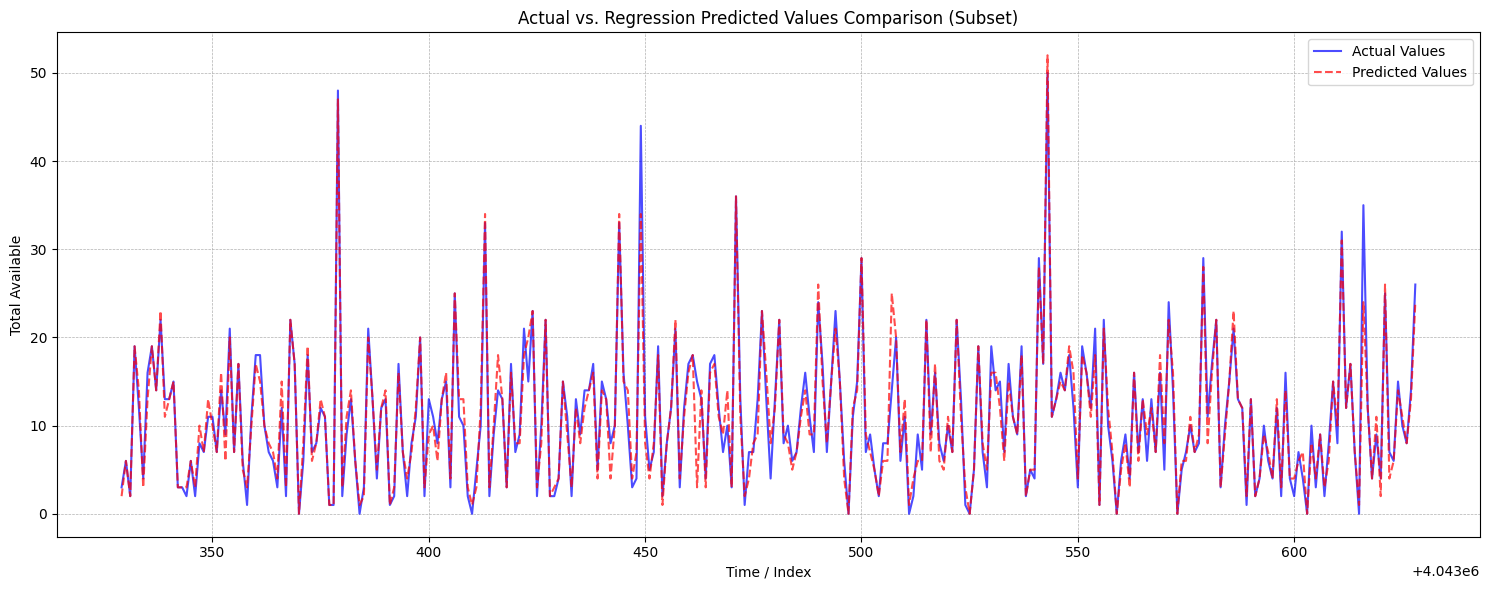

In [110]:
import pandas as pd

plot_subset = True # Set to False to plot all test data
subset_start = 0
subset_end = 300 # Plot the first 300 points of the test set

if plot_subset:
    # Check if y_test is a Pandas Series to use .iloc for slicing consistently
    if isinstance(y_test, pd.Series):
        y_test_subset = y_test.iloc[subset_start:subset_end]
        # Use the same index for predictions
        plot_index = y_test_subset.index
        predictions_subset = final_predictions[subset_start:subset_end]
    else: # Assume NumPy array
        y_test_subset = y_test[subset_start:subset_end]
        plot_index = range(subset_start, subset_end) # Simple range for x-axis
        predictions_subset = final_predictions[subset_start:subset_end]
else:
    y_test_subset = y_test
    predictions_subset = final_predictions
    # Determine index for plotting all data
    if isinstance(y_test, pd.Series):
        plot_index = y_test.index
    else:
        plot_index = range(len(y_test))

# --- Create the plot ---
plt.figure(figsize=(15, 6)) # Adjust figure size as needed

plt.plot(plot_index, y_test_subset, label='Actual Values', color='blue', alpha=0.7)
plt.plot(plot_index, predictions_subset, label='Predicted Values', color='red', alpha=0.7, linestyle='--')

# --- Add labels and title ---
plt.title('Actual vs. Regression Predicted Values Comparison' + (' (Subset)' if plot_subset else ''))
plt.xlabel('Time / Index')
plt.ylabel('Total Available')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() # Adjust layout

# --- Show the plot ---
plt.show()

In [111]:
# --- In your parameter definition ---
params_poisson = {
    'objective': 'poisson', # CHANGE HERE
    'metric': 'rmse',       # Monitor RMSE
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'random_state': 42,
    'verbose': -1,
    'n_estimators': 400,     # Use the best_iteration found earlier, or tune this
    'n_jobs': -1 # Use all available CPU cores
}

# --- Train using the new parameters ---
# (Assuming lgb_train, lgb_eval are already created as before)
print("\nStarting LightGBM training with Poisson objective...")
gbm_poisson = lgb.train(params_poisson,
                        lgb_train,
                        num_boost_round=1000,
                        valid_sets=[lgb_train, lgb_eval],
                        valid_names=['train', 'eval'],
                        callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=50)])

# --- Predict ---
# The output is the expected rate (lambda), which is a non-negative float
poisson_predictions_float = gbm_poisson.predict(X_test, num_iteration=gbm_poisson.best_iteration)

# *** You might STILL round this final rate if a strict integer count is needed ***
final_poisson_predictions = np.round(poisson_predictions_float).astype(int)
# Clamping at 0 might be redundant as Poisson output should be >= 0, but doesn't hurt
final_poisson_predictions = np.maximum(0, final_poisson_predictions)

print(final_poisson_predictions[:20]) # Print some examples


Starting LightGBM training with Poisson objective...
Training until validation scores don't improve for 10 rounds
[50]	train's rmse: 3.78048	eval's rmse: 3.37203
[100]	train's rmse: 2.57068	eval's rmse: 2.53141
[150]	train's rmse: 2.39742	eval's rmse: 2.42777
[200]	train's rmse: 2.35267	eval's rmse: 2.40596
[250]	train's rmse: 2.32813	eval's rmse: 2.39638
[300]	train's rmse: 2.3068	eval's rmse: 2.38587
[350]	train's rmse: 2.28426	eval's rmse: 2.38155
[400]	train's rmse: 2.27039	eval's rmse: 2.37487
Did not meet early stopping. Best iteration is:
[400]	train's rmse: 2.27039	eval's rmse: 2.37487
[ 2  6  2 19 13  3 14 19 14 23 11 12 15  3  3  2  6  3 10  7]


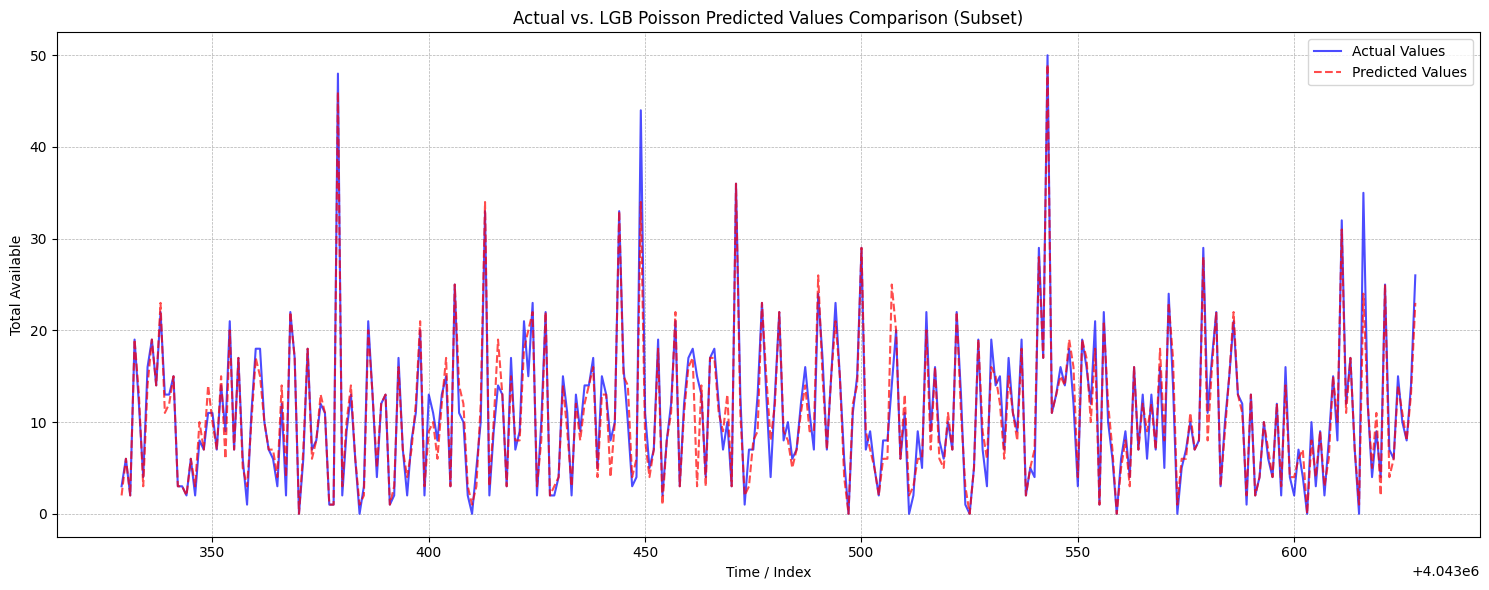

In [112]:
plot_subset = True # Set to False to plot all test data
subset_start = 0
subset_end = 300 # Plot the first 1000 points of the test set

if plot_subset:
    # Check if y_test is a Pandas Series to use .iloc for slicing consistently
    if isinstance(y_test, pd.Series):
        y_test_subset = y_test.iloc[subset_start:subset_end]
        # Use the same index for predictions
        plot_index = y_test_subset.index
        predictions_subset = final_poisson_predictions[subset_start:subset_end]
    else: # Assume NumPy array
        y_test_subset = y_test[subset_start:subset_end]
        plot_index = range(subset_start, subset_end) # Simple range for x-axis
        predictions_subset = final_poisson_predictions[subset_start:subset_end]
else:
    y_test_subset = y_test
    predictions_subset = final_poisson_predictions
    # Determine index for plotting all data
    if isinstance(y_test, pd.Series):
        plot_index = y_test.index
    else:
        plot_index = range(len(y_test))

# --- Create the plot ---
plt.figure(figsize=(15, 6)) # Adjust figure size as needed

plt.plot(plot_index, y_test_subset, label='Actual Values', color='blue', alpha=0.7)
plt.plot(plot_index, predictions_subset, label='Predicted Values', color='red', alpha=0.7, linestyle='--')

# --- Add labels and title ---
plt.title('Actual vs. LGB Poisson Predicted Values Comparison' + (' (Subset)' if plot_subset else ''))
plt.xlabel('Time / Index')
plt.ylabel('Total Available')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() # Adjust layout

In [114]:
# Create DMatrix objects, enabling categorical support
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Define parameters
# Note: some params like 'num_boost_round' are passed to train()
params = {
    'objective': 'count:poisson', # Or 'binary:logistic', 'multi:softprob'
    'eval_metric': 'rmse',           # Monitor MAE
    'tree_method': 'hist',
    'enable_categorical': True,    # If using categoricals
    'learning_rate': 0.05,
    'max_depth': 5,                # XGBoost often uses depth, not num_leaves directly
    'subsample': 0.9,              # Similar to bagging_fraction
    'colsample_bytree': 0.9,       # Similar to feature_fraction
    'random_state': 42,
    'n_estimators': 400,           # Adjust as needed, potentially based on early stopping
    'n_jobs': -1
}

# Specify datasets for watching performance during training
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Train the model
num_boost_round = 100 # Equivalent to n_estimators
bst = xgb.train(params,
                dtrain,
                num_boost_round=num_boost_round,
                evals=watchlist,
                early_stopping_rounds=10, # Optional
               )

# Predict (use best iteration if early stopping was used)
best_iteration = bst.best_iteration if hasattr(bst, 'best_iteration') else num_boost_round
float_predictions = bst.predict(dtest, iteration_range=(0, best_iteration))

# *** You might STILL round this final rate if a strict integer count is needed ***
final_xgb_poisson_predictions = np.round(float_predictions).astype(int)
# Clamping at 0 might be redundant as Poisson output should be >= 0, but doesn't hurt
final_xgb_poisson_predictions = np.maximum(0, final_xgb_poisson_predictions)

c:\Users\pc\anaconda3\envs\stenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [18:57:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "enable_categorical", "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[0]	train-rmse:10.03424	eval-rmse:8.21899
[1]	train-rmse:9.86186	eval-rmse:8.06675
[2]	train-rmse:9.67934	eval-rmse:7.90267
[3]	train-rmse:9.49777	eval-rmse:7.74090
[4]	train-rmse:9.31729	eval-rmse:7.58145
[5]	train-rmse:9.13798	eval-rmse:7.42446
[6]	train-rmse:8.95993	eval-rmse:7.26999
[7]	train-rmse:8.78327	eval-rmse:7.11823
[8]	train-rmse:8.61858	eval-rmse:6.98258
[9]	train-rmse:8.44491	eval-rmse:6.83609
[10]	train-rmse:8.27305	eval-rmse:6.69262
[11]	train-rmse:8.10312	eval-rmse:6.55209
[12]	train-rmse:7.94548	eval-rmse:6.42773
[13]	train-rmse:7.77968	eval-rmse:6.29304
[14]	train-rmse:7.61625	eval-rmse:6.16154
[15]	train-rmse:7.45537	eval-rmse:6.03337
[16]	train-rmse:7.29726	eval-rmse:5.90857
[17]	train-rmse:7.14208	eval-rmse:5.78721
[18]	train-rmse:6.99002	eval-rmse:5.66929
[19]	train-rmse:6.84112	eval-rmse:5.55466
[20]	train-rmse:6.70516	eval-rmse:5.45498
[21]	train-rmse:6.56277	eval-rmse:5.34668
[22]	train-rmse:6.42391	eval-rmse:5.24163
[23]	train-rmse:6.28850	eval-rmse:5.13963
[

In [115]:
final_xgb_poisson_predictions[:20]

array([ 3,  6,  3, 18, 14,  5, 14, 19, 14, 22, 12, 13, 15,  4,  4,  3,  6,
        4, 10,  7])

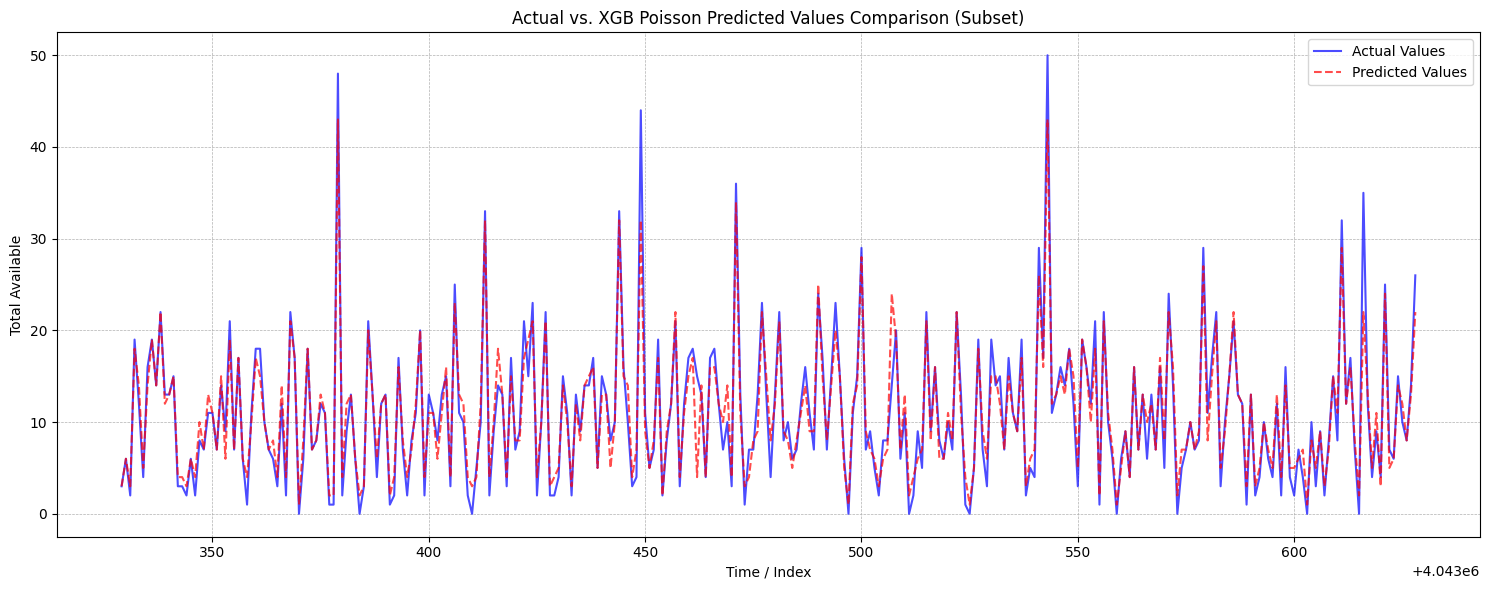

In [117]:
plot_subset = True # Set to False to plot all test data
subset_start = 0
subset_end = 300 # Plot the first 1000 points of the test set

if plot_subset:
    # Check if y_test is a Pandas Series to use .iloc for slicing consistently
    if isinstance(y_test, pd.Series):
        y_test_subset = y_test.iloc[subset_start:subset_end]
        # Use the same index for predictions
        plot_index = y_test_subset.index
        predictions_subset = final_xgb_poisson_predictions[subset_start:subset_end]
    else: # Assume NumPy array
        y_test_subset = y_test[subset_start:subset_end]
        plot_index = range(subset_start, subset_end) # Simple range for x-axis
        predictions_subset = final_xgb_poisson_predictions[subset_start:subset_end]
else:
    y_test_subset = y_test
    predictions_subset = final_xgb_poisson_predictions
    # Determine index for plotting all data
    if isinstance(y_test, pd.Series):
        plot_index = y_test.index
    else:
        plot_index = range(len(y_test))

# --- Create the plot ---
plt.figure(figsize=(15, 6)) # Adjust figure size as needed

plt.plot(plot_index, y_test_subset, label='Actual Values', color='blue', alpha=0.7)
plt.plot(plot_index, predictions_subset, label='Predicted Values', color='red', alpha=0.7, linestyle='--')

# --- Add labels and title ---
plt.title('Actual vs. XGB Poisson Predicted Values Comparison' + (' (Subset)' if plot_subset else ''))
plt.xlabel('Time / Index')
plt.ylabel('Total Available')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() # Adjust layout

In [118]:
print(f"Mode of labels in training data: {y_train.mode(dropna=True)}")
print(f"total_count of training labels: {len(y_train)}")
print(f"count of 0 in training labels: {len(y_train[y_train==0])}")
print(f"count of 3 in training labels: {len(y_train[y_train==3])}")
print(f"mode of y_train {y_train.mode()}")

Mode of labels in training data: 0    3
Name: total_available, dtype: int64
total_count of training labels: 4043329
count of 0 in training labels: 171897
count of 3 in training labels: 262859
mode of y_train 0    3
Name: total_available, dtype: int64


In [123]:
print(f"frequency of 0 in y_test {(y_test==0).mean():.3%}")
print(f"frequency of 0 in predictions {(final_predictions==0).mean():.3%}")

frequency of 0 in y_test 3.861%
frequency of 0 in predictions 2.180%


In [102]:
# Get float predictions (e.g., from the original regression model or poisson/tweedie)
# predictions_float = gbm.predict(X_test, num_iteration=gbm.best_iteration) # Or gbm_poisson.predict(...)
actual_zeros_mask = (y_test == 0)
predictions_for_actual_zeros = predictions[actual_zeros_mask]
print("Predictions when actual was 0:")
print(pd.Series(predictions_for_actual_zeros).describe().round(3))
# Are predictions here consistently >= 0.5? Or are they < 0.5 but maybe rounding wasn't applied?

Predictions when actual was 0:
count    8216.000
mean        0.801
std         1.206
min        -0.284
25%         0.000
50%         0.301
75%         1.084
max        14.454
dtype: float64
